# Preprocessing and EDA

In [1]:
import numpy as np
import pandas as pd

## Reading & Exploration

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv"
)
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


The data has 3 categories, with:
- 1 : positive
- 0 : neutral
- -1: negative

In [3]:
print("Shape")
print(df.shape)
print("\n Info")
print(df.info())
print("\n Missing values")
print(df.duplicated().sum())

Shape
(37249, 2)

 Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB
None

 Missing values
449


## Cleaning

### Removing any unneeded white spaces

In [4]:
df["clean_comment"] = df["clean_comment"].str.strip()
df.head()

,clean_comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


### Check the comments with urls

In [5]:
url_pattern = r"http\S+|www\S+"

print("Before checking urls")
print(df.shape[0])
df[df["clean_comment"].str.contains(url_pattern, regex=True, na=False)]

print("\nAfter removing urls")
df = df[~df["clean_comment"].str.contains(url_pattern, regex=True, na=False)]
print(df.shape[0])

Before checking urls
37249

After removing urls
37216


### Removing Slashes

In [6]:
print("Before removing slashes")
print(df.shape[0])

df["clean_comment"] = df["clean_comment"].str.replace("\n", " ", regex=True)

print("\nAfter removing slashes")
print(df.shape[0])

Before removing slashes
37216

After removing slashes
37216


## EDA

### General Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

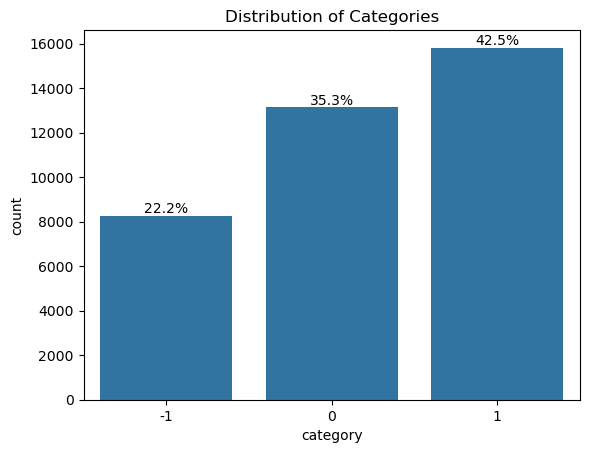

In [8]:
sns.countplot(data=df, x="category")

# Add percentages on top of bars
total = len(df)
ax = plt.gca()
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    ax.annotate(
        percentage,
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
    )

plt.title("Distribution of Categories")
plt.show()

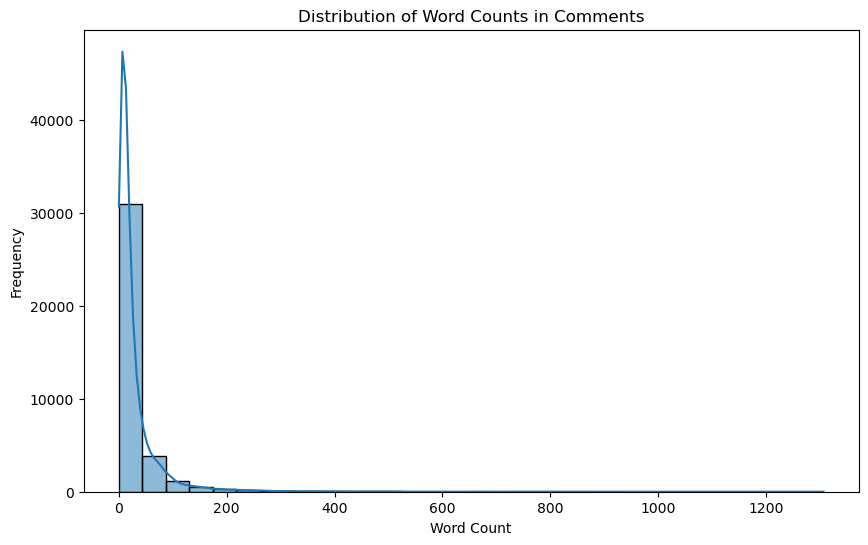

,clean_comment,word_count
0,family mormon have never tried explain them th...,39
1,buddhism has very much lot compatible with chr...,196
2,seriously don say thing first all they won get...,86
3,what you have learned yours and only yours wha...,29
4,for your own benefit you may want read living ...,112


In [9]:
df["word_count"] = (
    df["clean_comment"]
    .str.split()
    .apply(lambda x: len(x) if isinstance(x, list) else 0)
)

plt.figure(figsize=(10, 6))
sns.histplot(df["word_count"], bins=30, kde=True)
plt.title("Distribution of Word Counts in Comments")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

df[["clean_comment", "word_count"]].head()

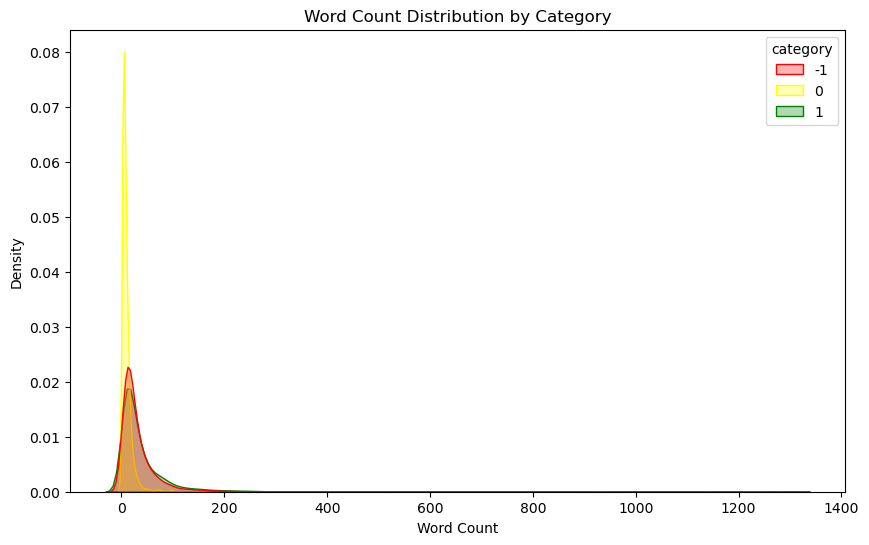

In [10]:
# plot positive, negative, and neutral comments word count distribution using density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="word_count",
    hue="category",
    fill=True,
    common_norm=False,
    alpha=0.3,
    palette={-1: "red", 0: "yellow", 1: "green"},
)
plt.title("Word Count Distribution by Category")
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.show()

### Words, Chars & Punctuation Analysis

In [11]:
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
df["num_stop_words"] = (
    df["clean_comment"]
    .str.split()
    .apply(
        lambda x: (
            sum(1 for word in x if word.lower() in stop_words)
            if isinstance(x, list)
            else 0
        )
    )
)
print(f"Number of stop words: {len(stop_words)}")

Number of stop words: 198


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yahiaehab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/var/folders/j4/hqhlkt0j3wg3lzrb14sfs64h0000gn/T/ipykernel_20967/3072348592.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='Frequency', y='Word', palette='mako')


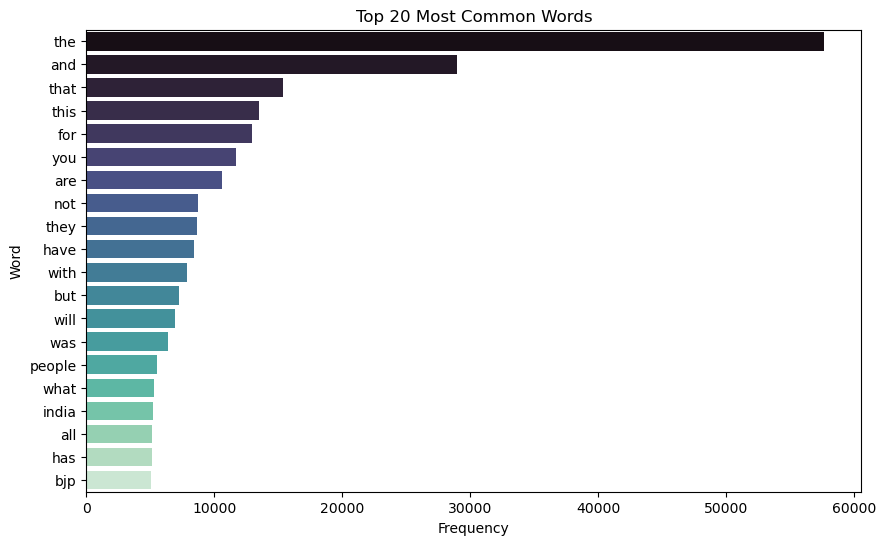

In [12]:
from collections import Counter

all_words = " ".join(df["clean_comment"].dropna()).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=["Word", "Frequency"])
plt.figure(figsize=(10, 6))
sns.barplot(data=common_words_df, x="Frequency", y="Word", palette="mako")
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

In [13]:
df["num_chars"] = df["clean_comment"].apply(lambda x: len(x) if pd.notna(x) else 0)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [15]:
# Create character frequency analysis
all_chars = "".join(df["clean_comment"].dropna())
char_freq = Counter(all_chars)

# Get bottom 20 least common characters
bottom_chars = char_freq.most_common()[-20:]
bottom_chars_df = pd.DataFrame(bottom_chars, columns=["Character", "Frequency"])

print("Bottom 20 least common characters:")
print(bottom_chars_df)

Bottom 20 least common characters:
   Character  Frequency
0          唯          1
1          统          1
2          ☝          1
3          ね          1
4          ゃ          1
5          ూ          1
6          ڈ          1
7          پ          1
8          ڑ          1
9          آ          1
10         ֹ          1
11         ֣          1
12         ֑          1
13         ֲ          1
14         ׃          1
15         ജ          1
16         ണ          1
17         р          1
18         ч          1
19         т          1


In [16]:
df["num_punctuation_chars"] = df["clean_comment"].apply(
    lambda x: sum(1 for char in x if char in ".,!?;:\"'()[]{}") if pd.notna(x) else 0
)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


### Ngrams Analysis

/var/folders/j4/hqhlkt0j3wg3lzrb14sfs64h0000gn/T/ipykernel_20967/3116773079.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigram_df, x='Frequency', y='Bigram', palette


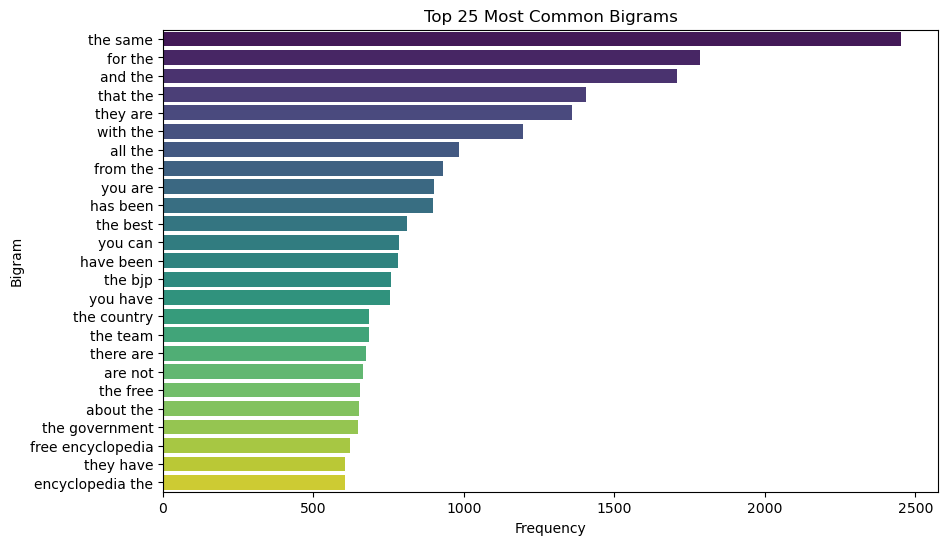

In [18]:
from sklearn.feature_extraction.text import CountVectorizer


# create a functions to extract the top 25 bigrams
def get_top_n_bigrams(corpus, n=None):
    # Filter out NaN values from the corpus
    clean_corpus = corpus.dropna()
    vec = CountVectorizer(ngram_range=(2, 2)).fit(clean_corpus)
    bag_of_words = vec.transform(clean_corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


top_25_bigrams = get_top_n_bigrams(df["clean_comment"], n=25)
bigram_df = pd.DataFrame(top_25_bigrams, columns=["Bigram", "Frequency"])
plt.figure(figsize=(10, 6))
sns.barplot(data=bigram_df, x="Frequency", y="Bigram", palette="viridis")
plt.title("Top 25 Most Common Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()

/var/folders/j4/hqhlkt0j3wg3lzrb14sfs64h0000gn/T/ipykernel_20967/179192607.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trigram_df, x='Frequency', y='Trigram', palette


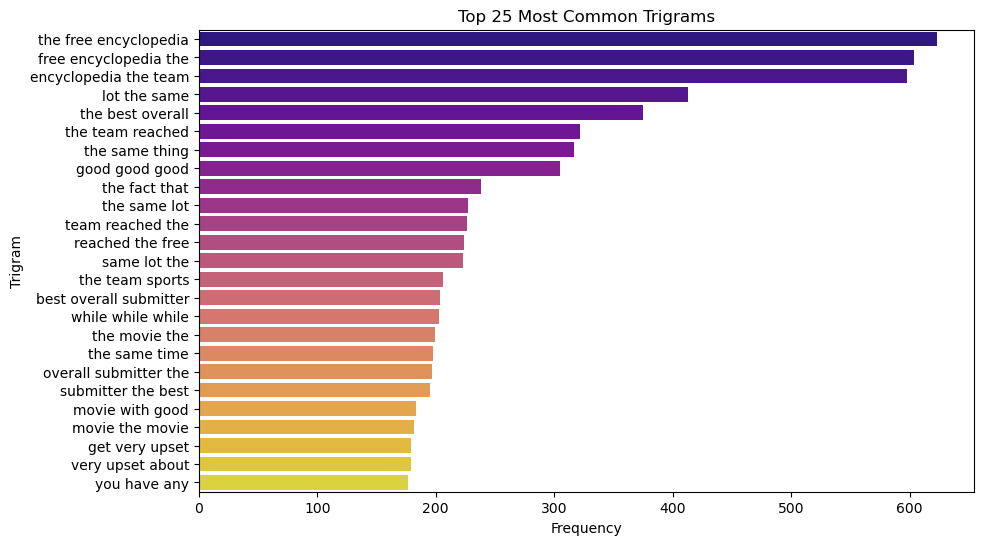

In [19]:
# create a functions to extract the top 25 trigrams
def get_top_n_trigrams(corpus, n=None):
    # Filter out NaN values from the corpus
    clean_corpus = corpus.dropna()
    vec = CountVectorizer(ngram_range=(3, 3)).fit(clean_corpus)
    bag_of_words = vec.transform(clean_corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


top_25_trigrams = get_top_n_trigrams(df["clean_comment"], n=25)
trigram_df = pd.DataFrame(top_25_trigrams, columns=["Trigram", "Frequency"])
plt.figure(figsize=(10, 6))
sns.barplot(data=trigram_df, x="Frequency", y="Trigram", palette="plasma")
plt.title("Top 25 Most Common Trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigram")
plt.show()

### Removing Stop words

In [20]:
stop_words = set(stopwords.words("english")) - {
    "no",
    "not",
    "nor",
    "don't",
    "didn't",
    "won't",
    "wouldn't",
    "couldn't",
    "shouldn't",
}
df["clean_comment"] = df["clean_comment"].apply(
    lambda x: (
        " ".join([word for word in x.split() if word.lower() not in stop_words])
        if pd.notna(x)
        else x
    )
)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [21]:
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")

lemmatizer = WordNetLemmatizer()

df["clean_comment"] = df["clean_comment"].apply(
    lambda x: (
        " ".join([lemmatizer.lemmatize(word) for word in x.split()])
        if pd.notna(x)
        else x
    )
)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yahiaehab/nltk_data...


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


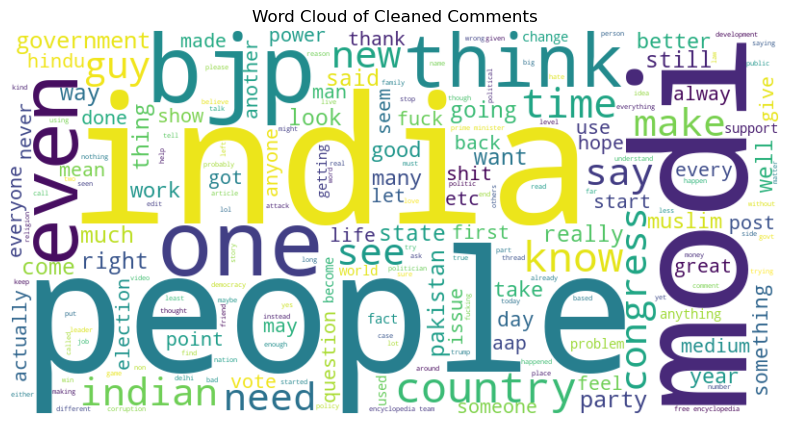

In [22]:
from wordcloud import WordCloud
from matplotlib.pyplot import imshow


def generate_wordcloud(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
        text
    )
    plt.figure(figsize=(10, 5))
    imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title)
    plt.show()


generate_wordcloud(
    " ".join(df["clean_comment"].dropna()), title="Word Cloud of Cleaned Comments"
)

/var/folders/j4/hqhlkt0j3wg3lzrb14sfs64h0000gn/T/ipykernel_20967/2862386831.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='Frequency', y='Word', palette='mako')


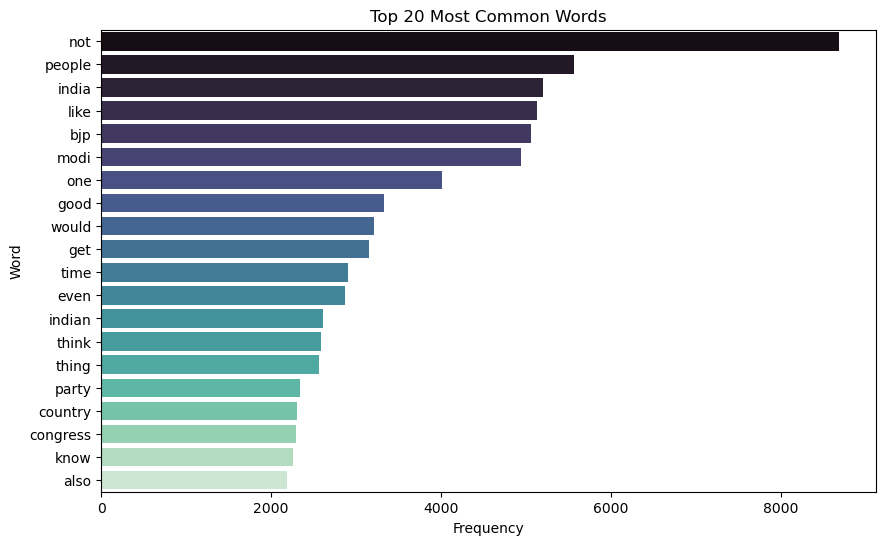

In [23]:
def plot_top_n_words(df, n=20):
    all_words = " ".join(df["clean_comment"].dropna()).split()
    word_freq = Counter(all_words)
    common_words = word_freq.most_common(n)
    common_words_df = pd.DataFrame(common_words, columns=["Word", "Frequency"])
    plt.figure(figsize=(10, 6))
    sns.barplot(data=common_words_df, x="Frequency", y="Word", palette="mako")
    plt.title(f"Top {n} Most Common Words")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.show()


plot_top_n_words(df, n=20)

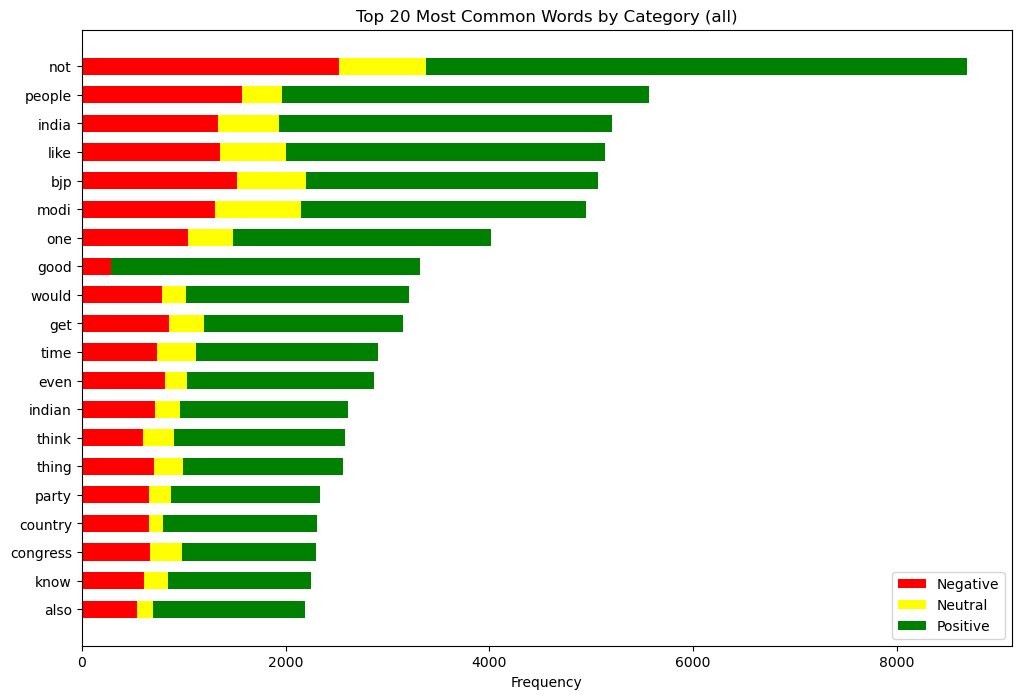

In [29]:
import matplotlib.pyplot as plt
import numpy as np


def plot_top_n_words_by_category(df, category="all", n=20):
    word_category_counts = {}

    # Build dictionary of word -> category counts
    for idx, row in df.iterrows():
        # Check if clean_comment is not NaN before splitting
        if pd.notna(row["clean_comment"]):
            words = row["clean_comment"].split()
            cat = row["category"]  # don't overwrite the function arg

            for word in words:
                if word not in word_category_counts:
                    word_category_counts[word] = {-1: 0, 0: 0, 1: 0}
                word_category_counts[word][cat] += 1

    # If filtering by category
    if category != "all":
        total_words_count = {
            word: counts[category] for word, counts in word_category_counts.items()
        }
    else:
        total_words_count = {
            word: sum(counts.values()) for word, counts in word_category_counts.items()
        }

    # Get top n words
    most_common_words = sorted(
        total_words_count.items(), key=lambda x: x[1], reverse=True
    )[:n]
    top_words = [word for word, count in most_common_words]

    # Extract category-specific counts
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot
    plt.figure(figsize=(12, 8))
    bar_height = 0.6

    plt.barh(
        top_words, negative_counts, color="red", label="Negative", height=bar_height
    )
    plt.barh(
        top_words,
        neutral_counts,
        color="yellow",
        label="Neutral",
        height=bar_height,
        left=negative_counts,
    )
    plt.barh(
        top_words,
        positive_counts,
        color="green",
        label="Positive",
        height=bar_height,
        left=np.array(negative_counts) + np.array(neutral_counts),
    )

    plt.xlabel("Frequency")
    plt.title(f"Top {n} Most Common Words by Category ({category})")
    plt.legend()
    plt.gca().invert_yaxis()  # so the most common word appears on top
    plt.show()


plot_top_n_words_by_category(df, category="all", n=20)